In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values. Selected fields that are not labeled as  flag or variable errors (to avoid
# possible correlated variables)
selected_features = df[["koi_disposition","koi_period", "koi_time0bk","koi_impact", "koi_duration","koi_depth",
                                      "koi_prad", "koi_teq", "koi_insol", "koi_model_snr", "koi_steff","koi_slogg",
                                      "koi_srad", "ra", "dec", "koi_kepmag"]]
selected_features.head()

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,6046,4.486,0.972,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Assign x and y values
X = selected_features.drop("koi_disposition", axis=1)
y = selected_features["koi_disposition"]

# Split training and testing data (default 75-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [5]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6080,12.496435,132.035800,1.1700,84.32000,271.7,55.34,1397,899.44,141.5,6821,3.805,2.730,289.23080,44.412483,13.054
3001,11.615625,131.968430,0.9770,2.23300,191.2,2.84,905,158.69,8.8,5332,4.083,1.453,293.52756,41.111439,15.162
570,10.980246,137.137607,0.7330,3.74464,50078.0,21.94,821,107.47,1555.4,5952,4.462,0.897,282.79764,43.578129,14.212
4897,466.908240,136.373100,0.0868,2.64000,660.0,2.19,210,0.46,5.4,5340,4.456,0.867,297.65436,43.178551,15.202
625,1.061933,133.850441,0.7130,2.14290,133.6,2.29,2508,9391.15,80.2,6134,3.975,1.851,288.90253,44.632992,12.953


In [6]:
y_train.head()

6080    FALSE POSITIVE
3001         CANDIDATE
570     FALSE POSITIVE
4897    FALSE POSITIVE
625     FALSE POSITIVE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data


# Create a MinMax scaler and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [8]:
# The best score is for the linear model with all the fields in the dataset

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test)

In [9]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5971771886324624
Testing Data Score: 0.584096109839817


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [10]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 3, 5, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [11]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.582, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.595, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.588, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.603, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.593, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.582, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.595, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.588, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.603, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[CV] .................. C=10, gamma=0.0001, score=0.630, total=   0.4s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.662, total=   0.4s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.624, total=   0.4s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.610, total=   0.4s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.625, total=   0.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.630, total=   0.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.662, total=   0.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   34.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 3, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
# Print the score and the best model parameters

print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.6301686811867354


In [13]:
# Print score for the training dataset

grid.score(X_train_scaled, y_train)

0.6355140186915887

In [14]:
# Print the score for the test dataset

grid.score(X_test_scaled, y_test)

0.6218535469107551

In [15]:
# Define the predictions

predictions = grid.predict(X_test_scaled)

In [16]:
# Print the confusion matrix metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.43      0.21      0.28       422
     CONFIRMED       0.51      0.71      0.59       450
FALSE POSITIVE       0.74      0.78      0.76       876

      accuracy                           0.62      1748
     macro avg       0.56      0.57      0.55      1748
  weighted avg       0.61      0.62      0.60      1748



In [17]:
# Random Forest: Print scores for training and test datasets

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train_scaled, y_train)
print(rf.score(X_train_scaled, y_train))
print(rf.score(X_test_scaled, y_test))

1.0
0.7660183066361556


In [18]:
# Tuning hyperameters using three models with number of trees (50, 100, 300) and number of levels in the decision tree

param_grid2 = {'n_estimators': [50, 100, 300],
              'max_depth': [50, 100, 200]}
grid2 = GridSearchCV(rf, param_grid2, verbose=3)

In [19]:
# Training the models

grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=50, n_estimators=50, score=0.759, total=   0.5s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.747, total=   0.5s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.774, total=   0.5s
[CV] max_depth=50, n_estimators=50 ...................................
[CV] ....... max_depth=50, n_estimators=50, score=0.757, total=   0.5s
[CV] max_depth=50, n_estimators=50 ...................................
[CV] ....... max_depth=50, n_estimators=50, score=0.727, total=   0.5s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.755, total=   0.9s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.738, total=   0.9s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.783, total=   0.9s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.744, total=   0.9s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [20]:
# Printing score and best model parameters

print(grid2.best_params_)
print(grid2.best_score_)

{'max_depth': 100, 'n_estimators': 300}
0.7571971488658773


In [21]:
# Score for the training dataset

grid2.score(X_train_scaled, y_train)

1.0

In [22]:
# Score for the test dataset

grid2.score(X_test_scaled, y_test)

0.7717391304347826

In [23]:
# Setting predictioons for the second model

predictions2 = grid2.predict(X_test_scaled)

In [24]:
# Print confusion matrix metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions2))

                precision    recall  f1-score   support

     CANDIDATE       0.64      0.50      0.56       422
     CONFIRMED       0.77      0.83      0.80       450
FALSE POSITIVE       0.82      0.87      0.84       876

      accuracy                           0.77      1748
     macro avg       0.74      0.73      0.74      1748
  weighted avg       0.76      0.77      0.76      1748



# KNN Model

k: 1, Train/Test Score: 1.000/0.552
k: 3, Train/Test Score: 0.765/0.589
k: 5, Train/Test Score: 0.719/0.596
k: 7, Train/Test Score: 0.700/0.609
k: 9, Train/Test Score: 0.690/0.615
k: 11, Train/Test Score: 0.678/0.613
k: 13, Train/Test Score: 0.678/0.620
k: 15, Train/Test Score: 0.674/0.620
k: 17, Train/Test Score: 0.669/0.614
k: 19, Train/Test Score: 0.665/0.622


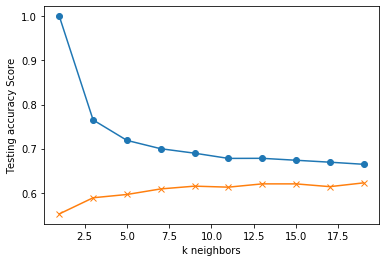

In [26]:
# KNN modeling

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
# k = 11 seems to be the best model for this dataset

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Test Acc: 0.613


# Save the Model

In [28]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'grid.sav'
joblib.dump(grid, 'grid.sav')

['grid.sav']